# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID"])

# Display the data table for preview
mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
mouse_metadata.info() #get general info on all dataframes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


In [3]:
study_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


In [4]:
mouse_data.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [5]:
# Checking the number of mice.
mouse_data["Timepoint"].value_counts()

0     250
5     238
10    223
15    207
20    195
25    183
30    171
35    154
40    142
45    130
Name: Timepoint, dtype: int64

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_data["Mouse ID"].value_counts() #Ten entries per mouse is the maximum # of timepoints evaluated. g989 was duplicated

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data = mouse_data[mouse_data["Mouse ID"] != "g989"] #remove mouse g989
mouse_data["Mouse ID"].value_counts()

k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
bydrug_summary = pd.DataFrame()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
groupby_drug = mouse_data.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
bydrug_summary["Tumor Vol mean"] = groupby_drug["Tumor Volume (mm3)"].mean()
bydrug_summary["Tumor Vol median"] = groupby_drug["Tumor Volume (mm3)"].median()
bydrug_summary["Tumor Vol Variance"] = groupby_drug["Tumor Volume (mm3)"].var()
bydrug_summary["Tumor Vol Std"] = groupby_drug["Tumor Volume (mm3)"].std()
bydrug_summary["Tumor Vol SEM"] = groupby_drug["Tumor Volume (mm3)"].sem() #finds standard error of mean

# Assemble the resulting series into a single summary DataFrame.
bydrug_summary


,Tumor Vol mean,Tumor Vol median,Tumor Vol Variance,Tumor Vol Std,Tumor Vol SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
groupby_drug_time = mouse_data.groupby(["Drug Regimen","Timepoint"], as_index=True).mean()
groupby_drug_time

C:\Users\Mark McLaughlin\AppData\Local\Temp\ipykernel_16012\2352708002.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupby_drug_time = mouse_data.groupby(["Drug Regimen","Timepoint"], as_index=True).mean()


Age_months  Weight (g)  Tumor Volume (mm3)  \
Drug Regimen Timepoint                                               
Capomulin    0           14.040000   20.120000           45.000000   
             5           14.040000   20.120000           44.266086   
             10          14.040000   20.120000           43.084291   
             15          13.666667   20.000000           42.064317   
             20          13.304348   19.782609           40.716325   
...                            ...         ...                 ...   
Zoniferol    25          12.500000   27.687500           55.432935   
             30          12.533333   27.733333           57.713531   
             35          13.071429   27.571429           60.089372   
             40          13.071429   27.571429           62.916692   
             45          13.071429   27.571429           65.960888   

                        Metastatic Sites  
Drug Regimen Timepoint                    
Capomulin    0                  0.000000  
             5                  0.160000  
             10                 0.320000  
             15                 0.375000  
             20                 0.652174  
...                                  ...  
Zoniferol    25                 1.687500  
             30                 1.933333  
             35                 2.285714  
             40                 2.785714  
             45                 3.071429  

[100 rows x 4 columns]

## Bar and Pie Charts

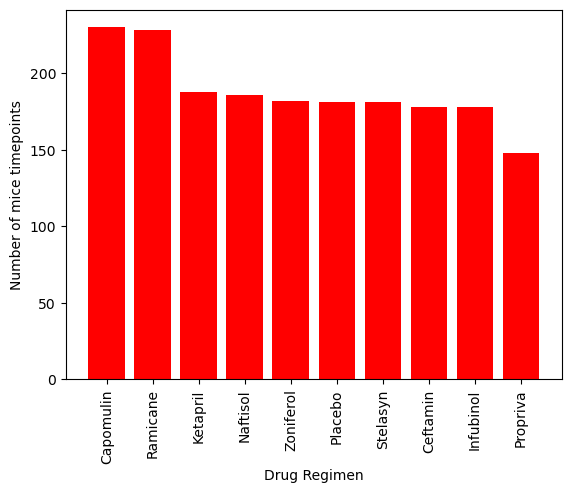

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pyplot.
counts = groupby_drug["Mouse ID"].count()
counts = counts.sort_values(ascending=False) #sort so bars are all in descending order

#I can use counts.index to return drug names, don't have to list them out
#drug_name = ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"] #x axis
drug_name = counts.index

plt.bar(drug_name,counts,color="r")

plt.xlabel("Drug Regimen") #labels x and y axis
plt.ylabel("Number of mice timepoints")

tickpoint = [value for value in drug_name] #makes the tick marks occur in center (default), needed argument in next row
plt.xticks(tickpoint,counts.index,rotation="vertical") #this is where the x axis is labeled and tick marks made
plt.show()

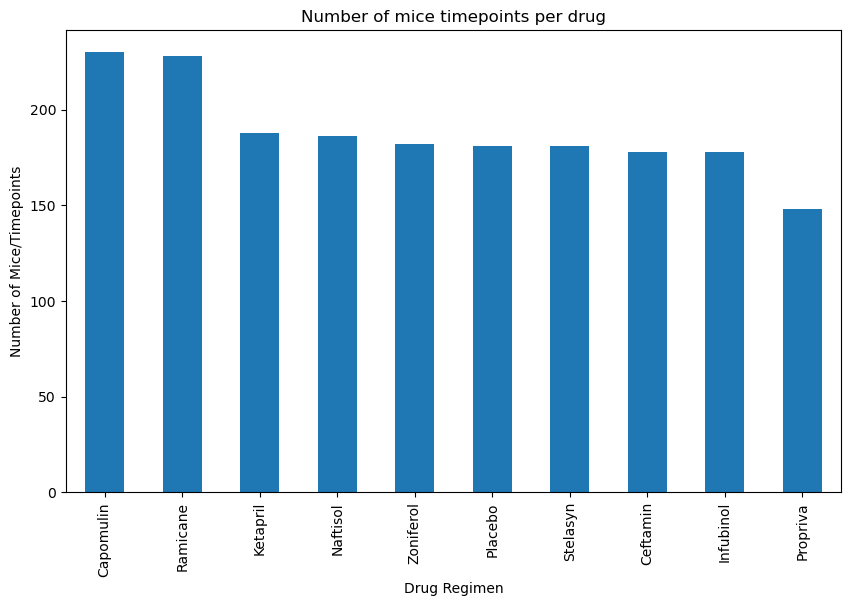

<Figure size 640x480 with 0 Axes>

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pandas.
counts = groupby_drug["Mouse ID"].count()

count_chart = counts.sort_values(ascending=False).plot(kind="bar", title="Number of mice timepoints per drug", figsize=(10,6)) #figsize is the width and hieght of the bars
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Number of Mice/Timepoints")
plt.show()
plt.tight_layout() #not sure what this does


([<matplotlib.patches.Wedge at 0x242982b8f70>,
 [Text(-0.03608946990830779, 1.1994571897995099, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.021052190779846207, 0.6996833607163808, '50.96%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.04%')])

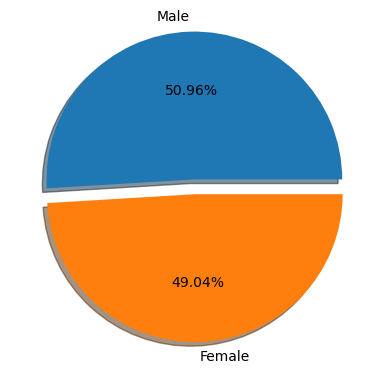

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pyplot
sex_count = mouse_data["Sex"].value_counts()
labels= sex_count.index #indexes are Male and Female
explode = (0.1,0)
plt.pie(sex_count,labels=labels,shadow=True,autopct="%1.2f%%",explode=explode)

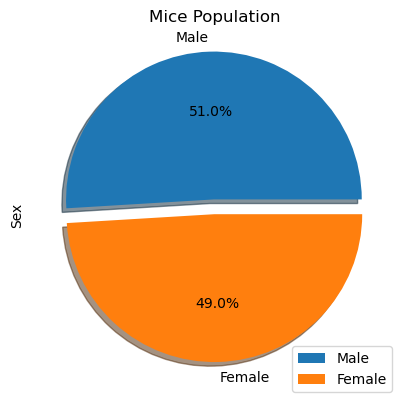

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = pd.DataFrame(mouse_data["Sex"].value_counts()) #make data frame for male and female mice sex
#labels = mouse_data["Sex"].value_counts() #label number on graph, same as line above but not putting it into DF

sex_pie = sex_count.plot(kind="pie",y="Sex",title="Mice Population",autopct="%1.1f%%",shadow=True,explode=explode) #autopct displays percentages
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#apparently every mouse started with the exact same tumor size.
per_mouse = mouse_data.groupby(["Mouse ID"]).max() #groupsby mouse with max values in group
max_timepoint = pd.DataFrame(per_mouse["Timepoint"]) #returns max timepoint for each mouse in new DF
max_timepoint = max_timepoint.rename(columns={"Timepoint":"Max Timepoint"}) #rename column so it can merge with other DF that also has a Timepoint column


#Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged = pd.merge(mouse_data,max_timepoint,how="inner",on=["Mouse ID"])
#merged["Max Timepoint"].value_counts()
merged.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
5,k403,Ramicane,Male,21,16,25,33.464577,1,45
6,k403,Ramicane,Male,21,16,30,31.099498,1,45
7,k403,Ramicane,Male,21,16,35,26.546993,1,45
8,k403,Ramicane,Male,21,16,40,24.365505,1,45
9,k403,Ramicane,Male,21,16,45,22.050126,1,45


In [15]:
#Filter out for the 4 drugs asked
drug_filtered = merged.loc[(merged["Drug Regimen"] == "Capomulin") | 
                           (merged["Drug Regimen"] == "Ramicane") | 
                           (merged["Drug Regimen"] == "Infubinol") | 
                           (merged["Drug Regimen"] == "Ceftamin")]
drug_filtered


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1855,z581,Infubinol,Female,24,25,25,54.316407,2,45
1856,z581,Infubinol,Female,24,25,30,56.286750,2,45
1857,z581,Infubinol,Female,24,25,35,58.628399,3,45
1858,z581,Infubinol,Female,24,25,40,60.053740,3,45


In [16]:
groupby_mouse_time = drug_filtered.groupby(["Mouse ID","Timepoint","Drug Regimen"]).mean() #groupby mouse, timepoint, and drug to keep the column
groupby_mouse_time = groupby_mouse_time.reset_index() #reset index so I can filter by Timepoints
#groupby_mouse_time

#begin filtering timepoints that are not max
filtered = groupby_mouse_time.loc[groupby_mouse_time["Timepoint"] == groupby_mouse_time["Max Timepoint"] ]
filtered

C:\Users\Mark McLaughlin\AppData\Local\Temp\ipykernel_16012\2244213442.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupby_mouse_time = drug_filtered.groupby(["Mouse ID","Timepoint","Drug Regimen"]).mean() #groupby mouse, timepoint, and drug to keep the column


,Mouse ID,Timepoint,Drug Regimen,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites,Max Timepoint
9,a203,45,Infubinol,20.0,23.0,67.973419,2.0,45.0
19,a251,45,Infubinol,21.0,25.0,65.525743,1.0,45.0
29,a275,45,Ceftamin,20.0,28.0,62.999356,3.0,45.0
39,a411,45,Ramicane,3.0,22.0,38.407618,1.0,45.0
49,a444,45,Ramicane,10.0,25.0,43.047543,0.0,45.0
...,...,...,...,...,...,...,...,...
773,y769,45,Ceftamin,6.0,27.0,68.594745,4.0,45.0
783,y793,45,Capomulin,17.0,17.0,31.896238,2.0,45.0
793,y865,45,Ceftamin,23.0,26.0,64.729837,3.0,45.0
803,z578,45,Ramicane,11.0,16.0,30.638696,0.0,45.0


In [17]:
groupby_drug2 = filtered.groupby(["Drug Regimen"]).mean().reset_index()
groupby_drug2

C:\Users\Mark McLaughlin\AppData\Local\Temp\ipykernel_16012\571530461.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupby_drug2 = filtered.groupby(["Drug Regimen"]).mean().reset_index()


,Drug Regimen,Timepoint,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,Capomulin,41.0,14.04,20.12,36.667568,1.28,41.0
1,Ceftamin,30.6,12.80,27.40,57.753977,1.72,30.6
2,Infubinol,30.6,16.40,27.32,58.178246,1.60,30.6
3,Ramicane,40.6,10.84,20.00,36.191390,1.20,40.6


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Tumor_vol = {"Treatments": Treatments, "LQL": [], "UQL": [], "IQR": [], "Lowbound": [], "Upbound": []}
outlier = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Use for loop to collect boxplot info on each drug and append it to the dictionary

for item in Treatments:
    per_drug = filtered.loc[filtered["Drug Regimen"] == item]
    quartiles = per_drug["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
    LQL = quartiles[0.25]
    Tumor_vol["LQL"].append(LQL)
    
    UQL = quartiles[0.75]
    Tumor_vol["UQL"].append(UQL)
    
    IQR = UQL - LQL
    Tumor_vol["IQR"].append(IQR)
    
    Lowbound = LQL - 1.5*IQR
    Tumor_vol["Lowbound"].append(Lowbound)
    
    Upbound = UQL + 1.5*IQR
    Tumor_vol["Upbound"].append(Upbound)
    
    outliers = per_drug.loc[(per_drug["Tumor Volume (mm3)"] > Upbound) | (per_drug["Tumor Volume (mm3)"] < Lowbound)]
    outliers = outliers["Mouse ID"]
    outlier.append(outliers)
    


tumor_quartiles = pd.DataFrame(Tumor_vol)
tumor_quartiles
    
    
    # Determine outliers using upper and lower bounds



,Treatments,LQL,UQL,IQR,Lowbound,Upbound
0,Capomulin,32.377357,40.159220,7.781863,20.704562,51.832015
1,Ramicane,31.560470,40.659006,9.098537,17.912664,54.306811
2,Infubinol,54.048608,65.525743,11.477135,36.832905,82.741446
3,Ceftamin,48.722078,64.299830,15.577752,25.355450,87.666458


In [19]:
#Get lists ready for boxplot. append raw rata lists
boxplot = {"Capomulin":[], "Ramicane": [], "Infubinol": [], "Ceftamin":[]}
a = filtered.loc[filtered["Drug Regimen"] == "Capomulin"]
boxplot["Capomulin"].append(a["Tumor Volume (mm3)"])

b = filtered.loc[filtered["Drug Regimen"] == "Ramicane"]
boxplot["Ramicane"].append(b["Tumor Volume (mm3)"])

c = filtered.loc[filtered["Drug Regimen"] == "Infubinol"]
boxplot["Infubinol"].append(c["Tumor Volume (mm3)"])

d = filtered.loc[filtered["Drug Regimen"] == "Ceftamin"]
boxplot["Ceftamin"].append(d["Tumor Volume (mm3)"])

boxplot = pd.DataFrame(boxplot)
boxplot

,Capomulin,Ramicane,Infubinol,Ceftamin
0,96 38.982878 113 38.939633 205 30.48...,39 38.407618 49 43.047543 59 38.81...,9 67.973419 19 65.525743 66 57.03...,29 62.999356 97 45.000000 103 56.05...


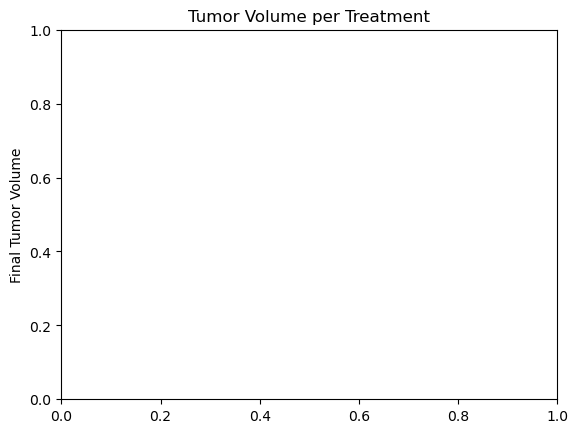

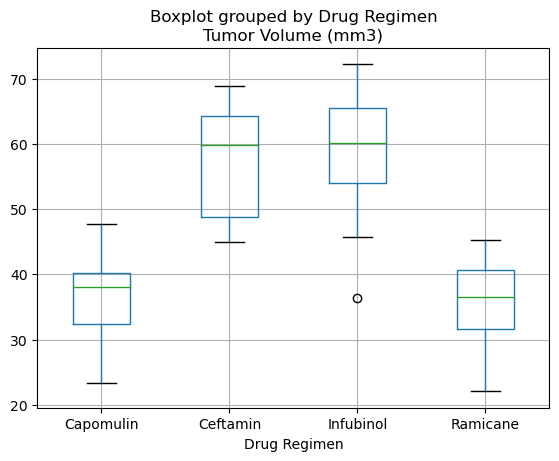

In [20]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volume per Treatment")
ax1.set_ylabel("Final Tumor Volume")
ax1 = filtered.boxplot("Tumor Volume (mm3)",by="Drug Regimen") #boxplot function can already groupby with "by" didn't need to create groupby_drug2
plt.show()

## Line and Scatter Plots

<Axes: xlabel='Timepoint', ylabel='Tumor Volume (mm3)'>

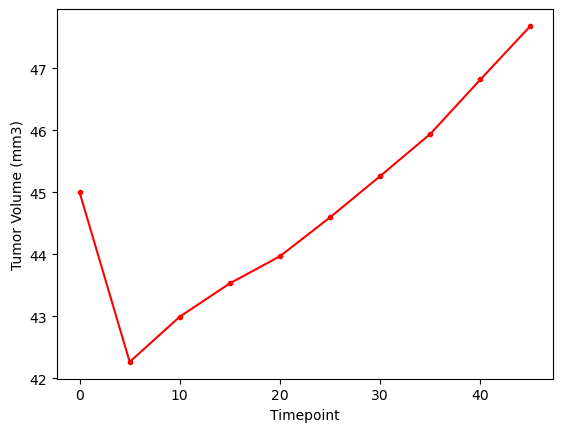

In [21]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin = mouse_data.loc[mouse_data["Drug Regimen"] == "Capomulin"]
one_mouse = Capomulin.loc[Capomulin["Mouse ID"] == "i557"] 


one_mouse.plot("Timepoint","Tumor Volume (mm3)",style=".-",color="r",ylabel="Tumor Volume (mm3)",legend=False)


C:\Users\Mark McLaughlin\AppData\Local\Temp\ipykernel_16012\602623832.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_tumor_size = mouse_data.groupby("Mouse ID").mean() #avg tumor size across all timepoints


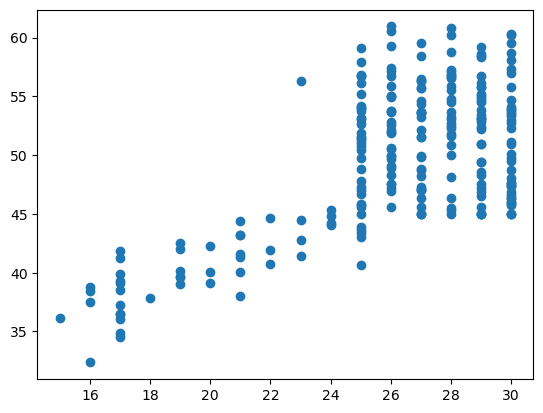

In [22]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_tumor_size = mouse_data.groupby("Mouse ID").mean() #avg tumor size across all timepoints
Tumor_size = avg_tumor_size["Tumor Volume (mm3)"]
weight = avg_tumor_size["Weight (g)"]


plt.scatter(weight,Tumor_size,label="Weight")
plt.xlabel = ("Weight")
plt.ylabel = ("Avg Tumor Size")
plt.show()

#avg_cap_tumor = avg_tumor_size.loc[avg_tumor_size]

## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(weight,Tumor_size)
correlation = round(correlation[0],2)
print(f' The correlation coefficient is', correlation)

 The correlation coefficient is 0.66


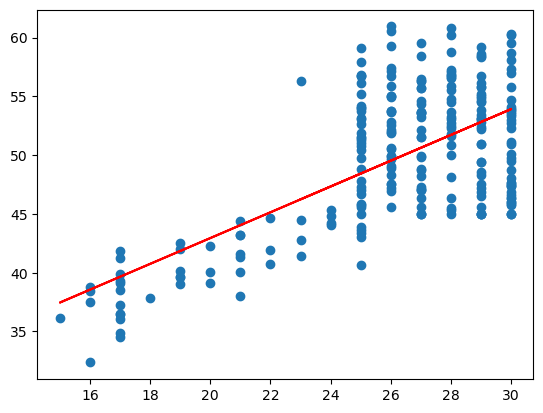

In [36]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, Tumor_size)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,Tumor_size,label="Weight")
plt.plot(weight,regress_values,"r-")
plt.xlabel = ('Weight')
plt.ylabel = ("Avg Tumor Size")
plt.show()